In [15]:
import pandas as pd
import matplotlib
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from itertools import cycle
import matplotlib.colors as colors
from sklearn.neural_network import MLPClassifier
import warnings, gc
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
data = pd.read_csv("Final_Data.csv.xls")

In [4]:
data2 = pd.read_csv("Final_Data_new.csv.xls")

In [4]:
df = pd.DataFrame(data)
print("Number of rows and columns are:")
df.shape

Number of rows and columns are:


(99730, 86)

In [6]:
df2 = pd.DataFrame(data2)
print("Number of rows and columns are:")
df2.shape


Number of rows and columns are:


(99730, 87)

In [5]:
df=df[0:99729]
from sklearn.model_selection import train_test_split

In [6]:
y = df["target"]
del df["target"]
X_train, X_test,y_train, y_test = train_test_split(df,y ,
                                   random_state=104, 
                                   test_size=0.20, 
                                   shuffle=True)

X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)
ids=X_train["Customer_id"]
ids2=X_test["Customer_id"]
del X_train["Customer_id"]
del X_test["Customer_id"]

In [9]:
y2 = df2["target"]
del df2["target"]
X_train2, X_test2,y_train2, y_test2 = train_test_split(df2,y2 ,
                                   random_state=104, 
                                   test_size=0.20, 
                                   shuffle=True)

X_train2=pd.DataFrame(X_train2)
X_test2=pd.DataFrame(X_test2)
ids22=X_train2["Customer_id"]
ids222=X_test2["Customer_id"]
del X_train2["Customer_id"]
del X_test2["Customer_id"]

In [7]:
print(X_train.shape)
print(X_test.shape)

(79783, 84)
(19946, 84)


In [8]:
print(y_train.shape)
print(y_test.shape)

(79783,)
(19946,)


In [9]:
X_train.head()

,P_2_band,P_3_band,P_4_band,S_3_band,S_5_band,S_7_band,S_8_band,S_15_band,S_22_band,S_24_band,...,D_59_band,D_60_band,D_61_band,D_62_band,D_70_band,D_71_band,D_74_band,D_75_band,D_77_band,D_64_band
9711,-3.845729,-0.351891,-0.249243,-1.018410,-0.397385,-1.018410,-0.054942,0.337459,-1.026459,-1.019455,...,-1.027929,-0.881089,-0.951903,0.486268,0.955359,-0.643371,-1.101580,-1.149828,0.441005,-0.472721
69687,0.169598,0.858900,0.594641,1.180612,0.408102,1.128421,0.136282,0.209675,1.082037,0.126586,...,0.246694,-0.625420,-1.279794,0.486268,-0.468284,0.021476,-1.101580,-2.239289,0.995035,0.718275
63530,-1.954492,-0.648752,0.594641,-1.018410,-0.560612,-1.018410,-0.054942,0.337459,-1.026459,-1.019455,...,-1.027929,-0.881089,0.443796,0.486268,-0.502247,-0.006332,1.286179,0.236669,0.441005,0.444301
17321,1.709071,-0.339857,0.594641,0.397125,-0.560612,0.416050,0.587040,0.337459,0.170935,0.774650,...,0.385645,-0.625420,-0.951903,-0.975950,-0.468284,0.430839,-1.615188,-1.149828,0.995035,0.444301
3959,1.709071,0.858900,0.594641,1.180612,0.408102,1.128421,0.587040,0.337459,0.170935,0.126586,...,0.005307,0.638791,1.462288,0.486268,0.955359,0.430839,0.157175,0.236669,0.441005,-0.472721


In [13]:
df.head()

,Customer_id,P_2_band,P_3_band,P_4_band,S_3_band,S_5_band,S_7_band,S_8_band,S_15_band,S_22_band,...,D_59_band,D_60_band,D_61_band,D_62_band,D_70_band,D_71_band,D_74_band,D_75_band,D_77_band,D_64_band
0,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,-3.845729,-0.351891,0.594641,-1.018410,-0.560612,-1.018410,-0.054942,0.209675,-1.026459,...,0.005307,-0.881089,-0.951903,0.486268,0.955359,0.021476,0.157175,0.236669,0.441005,-0.472721
1,0000d17a1447b25a01e42e1ac56b091bb7cbb06317be4c...,-3.845729,-0.351891,-0.226492,-1.379322,0.356488,-1.340757,-0.964787,-0.036543,-0.503002,...,0.246694,0.638791,-2.363312,-2.249836,-0.359960,-0.643371,-1.101580,-1.149828,-2.474885,0.310780
2,0002d381bdd8048d76719042cf1eb63caf53b636f8aacd...,-3.845729,-0.648752,-0.249243,0.397125,-0.560612,-0.287716,0.136282,-0.738210,-1.026459,...,0.005307,0.638791,-2.363312,-0.819065,-0.502247,0.021476,-1.615188,-1.149828,-1.866227,-0.472721
3,0002e335892f7998f0feb3a59f32d652f0da7c85e535b9...,0.169598,-0.648752,-0.226492,-1.018410,-0.397385,-1.018410,-0.054942,0.209675,-1.026459,...,0.005307,-0.625420,-2.363312,-0.975950,-0.468284,0.021476,-1.615188,-2.239289,0.441005,-0.095339
4,0003b7891c49786441d138c01f55f1712df645989dcd2a...,-3.845729,-0.351891,0.594641,1.180612,0.356488,1.128421,0.587040,0.209675,0.170935,...,0.005307,-0.625420,-1.279794,-0.975950,-0.359960,-0.643371,-1.615188,0.236669,0.441005,-0.472721


In [18]:

scaler=MinMaxScaler()

#del df["Customer_id"]

X_train=scaler.fit_transform(X_train)
X_test=pd.DataFrame(X_test)
X_train["Customer_id"]=ids
X_test["Customer_id"]=ids2

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [190]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

del df2["Customer_id"]

X_train2=scaler.fit_transform(X_train2)
X_train2=pd.DataFrame(norm_data)
X_train2["Customer_id"]=ids22
X_test2["Customer_id"]=ids222

In [54]:
X_train.head()

,Customer_id,P_2_band,P_3_band,P_4_band,S_3_band,S_5_band,S_7_band,S_8_band,S_15_band,S_22_band,...,D_60_band,D_61_band,D_62_band,D_70_band,D_71_band,D_74_band,D_75_band,D_77_band,D_64_band,target
9711,19361443a460532df77655e275ef0bac6361b4fe138aca...,-3.845729,-0.351891,-0.249243,-1.018410,-0.397385,-1.018410,-0.054942,0.337459,-1.026459,...,-0.881089,-0.951903,0.486268,0.955359,-0.643371,-1.101580,-1.149828,0.441005,-0.472721,0
69687,b2fde7c62713e7e0aa6ac5b796305bed52092d700ff256...,0.169598,0.858900,0.594641,1.180612,0.408102,1.128421,0.136282,0.209675,1.082037,...,-0.625420,-1.279794,0.486268,-0.468284,0.021476,-1.101580,-2.239289,0.995035,0.718275,1
63530,a30be57ada2fe8960a902071ec01a9ce3ea3af5f3e7d6a...,-1.954492,-0.648752,0.594641,-1.018410,-0.560612,-1.018410,-0.054942,0.337459,-1.026459,...,-0.881089,0.443796,0.486268,-0.502247,-0.006332,1.286179,0.236669,0.441005,0.444301,0
17321,2cdaa508af28921154dfd60da78c764e99a14cdb6fe0a9...,1.709071,-0.339857,0.594641,0.397125,-0.560612,0.416050,0.587040,0.337459,0.170935,...,-0.625420,-0.951903,-0.975950,-0.468284,0.430839,-1.615188,-1.149828,0.995035,0.444301,0
3959,0a44137ea16de80dbed8da333e28bdf593c90bb01e64ec...,1.709071,0.858900,0.594641,1.180612,0.408102,1.128421,0.587040,0.337459,0.170935,...,0.638791,1.462288,0.486268,0.955359,0.430839,0.157175,0.236669,0.441005,-0.472721,1


Iteration 1, loss = 0.29846286
Iteration 2, loss = 0.28797789
Iteration 3, loss = 0.28429854
Iteration 4, loss = 0.28129768
Iteration 5, loss = 0.27689394
Iteration 6, loss = 0.27258188
Iteration 7, loss = 0.26635317
Iteration 8, loss = 0.25904262
Iteration 9, loss = 0.24988558
Iteration 10, loss = 0.23840073
Iteration 11, loss = 0.22507457
Iteration 12, loss = 0.20975301
Iteration 13, loss = 0.19317602
Iteration 14, loss = 0.17672346
Iteration 15, loss = 0.16046132
Iteration 16, loss = 0.14612148
Iteration 17, loss = 0.13173097
Iteration 18, loss = 0.12019015
Iteration 19, loss = 0.11085209
Iteration 20, loss = 0.09863766
Iteration 21, loss = 0.09007683
Iteration 22, loss = 0.08387142
Iteration 23, loss = 0.08098855
Iteration 24, loss = 0.07249862
Iteration 25, loss = 0.07178977
Iteration 26, loss = 0.06189140
Iteration 27, loss = 0.05704246
Iteration 28, loss = 0.05724379
Iteration 29, loss = 0.05419142
Iteration 30, loss = 0.05201302
Iteration 31, loss = 0.04952244
Iteration 32, los

Iteration 19, loss = 0.11819079
Iteration 20, loss = 0.10810332
Iteration 21, loss = 0.09906302
Iteration 22, loss = 0.09143194
Iteration 23, loss = 0.08449117
Iteration 24, loss = 0.07971936
Iteration 25, loss = 0.07345287
Iteration 26, loss = 0.07212760
Iteration 27, loss = 0.06530085
Iteration 28, loss = 0.06105545
Iteration 29, loss = 0.05989182
Iteration 30, loss = 0.05469223
Iteration 31, loss = 0.05461844
Iteration 32, loss = 0.04834924
Iteration 33, loss = 0.04951337
Iteration 34, loss = 0.04458681
Iteration 35, loss = 0.04420045
Iteration 36, loss = 0.04145132
Iteration 37, loss = 0.03780993
Iteration 38, loss = 0.04074252
Iteration 39, loss = 0.03820153
Iteration 40, loss = 0.03171694
Iteration 41, loss = 0.03949261
Iteration 42, loss = 0.03266135
Iteration 43, loss = 0.03359410
Iteration 44, loss = 0.03031651
Iteration 45, loss = 0.03108564
Iteration 46, loss = 0.03289418
Iteration 47, loss = 0.03049860
Iteration 48, loss = 0.02729063
Iteration 49, loss = 0.02588528
Iteratio

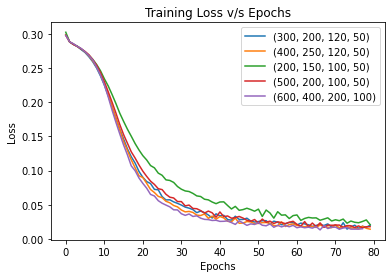

In [141]:

layers=[(300,200,120,50),(400,250,120,50),(200,150,100,50),(500,200,100,50),(600,400,200,100)]
leg = []

plt.title('Training Loss v/s Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')

for i in range(len(layers)):
    tup = layers[i]
    leg.append(tup)
    clf_1 = MLPClassifier(hidden_layer_sizes=layers[i], activation='relu', max_iter=80, verbose=True).fit(X_train, y_train)
    plt.plot(clf_1.loss_curve_)

plt.legend(leg)
plt.show()

In [113]:
classifier = MLPClassifier(hidden_layer_sizes=(200,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(y_pred, y_test)
# print("Accuracy of MLPClassifier : ", accuracy(cm))
from sklearn.metrics import accuracy_score
o=accuracy_score(y_pred,y_test)
print(o)

0.8364584377820115


In [130]:
mlp_gs = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(300,200,120,50),(400,250,120,50),(200,150,100,50)],
    'activation': ['tanh', 'relu','logistic'],
    'solver': ['sgd', 'adam'],
    'learning_rate_init':[0.1,0.001],
    'shuffle':[True, False],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=2)
clf.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu', 'logistic'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(300, 200, 120, 50),
                                                (400, 250, 120, 50),
                                                (200, 150, 100, 50)],
                         'learning_rate': ['constant', 'adaptive'],
                         'learning_rate_init': [0.1, 0.001],
                         'shuffle': [True, False], 'solver': ['sgd', 'adam']})

In [131]:
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (200, 150, 100, 50), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'shuffle': True, 'solver': 'sgd'}


In [143]:
#MLP without L2 regulrization

classifier1 = MLPClassifier(hidden_layer_sizes=(200, 150, 100, 50), max_iter=300,activation = 'tanh',solver='sgd',random_state=1)
classifier1.fit(X_train, y_train)
y_pred1 = classifier1.predict(X_test)

cm = confusion_matrix(y_pred1, y_test)

o=accuracy_score(y_pred1,y_test)
print(o)

0.8479394364784919


In [21]:
classifier1 = MLPClassifier(hidden_layer_sizes=(200, 150, 100, 50), max_iter=300,activation = 'tanh',solver='sgd',random_state=1)
classifier1.fit(X_train, y_train)
y_pred1 = classifier1.predict(X_test)

cm = confusion_matrix(y_pred1, y_test)

o=accuracy_score(y_pred1,y_test)
print(o)

0.8479394364784919


In [30]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred1))
print('Precision: %.3f' % precision_score(y_test, y_pred1))
print('Recall: %.3f' % recall_score(y_test, y_pred1))
print('F1: %.3f' % f1_score(y_test, y_pred1))

Accuracy: 0.848
Precision: 0.695
Recall: 0.677
F1: 0.686


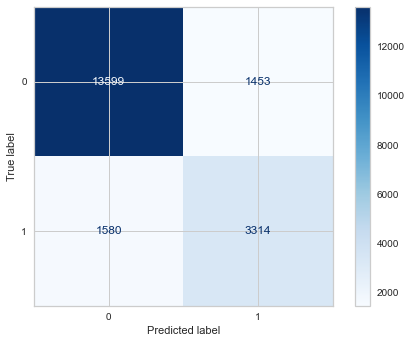

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
confusion_matrix(y_test, y_pred1)
m=plot_confusion_matrix(classifier1, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

In [12]:
#MLP with L2 regularization

classifier2 = MLPClassifier(hidden_layer_sizes=(200, 150, 100, 50), max_iter=300,activation = 'tanh',solver='sgd',random_state=1,alpha=0.05)
classifier2.fit(X_train, y_train)
y_pred2 = classifier2.predict(X_test)

cm = confusion_matrix(y_pred2, y_test)
o=accuracy_score(y_pred2,y_test)
print(o)

0.8590694876165648


In [36]:
def amex_metric(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:

    def top_four_percent_captured(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        df = (pd.concat([y_true, y_pred], axis='columns')
              .sort_values('prediction', ascending=False))
        df['weight'] = df['target'].apply(lambda x: 20 if x==0 else 1)
        four_pct_cutoff = int(0.04 * df['weight'].sum())
        df['weight_cumsum'] = df['weight'].cumsum()
        df_cutoff = df.loc[df['weight_cumsum'] <= four_pct_cutoff]
        return (df_cutoff['target'] == 1).sum() / (df['target'] == 1).sum()
        
    def weighted_gini(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        df = (pd.concat([y_true, y_pred], axis='columns')
              .sort_values('prediction', ascending=False))
        df['weight'] = df['target'].apply(lambda x: 20 if x==0 else 1)
        df['random'] = (df['weight'] / df['weight'].sum()).cumsum()
        total_pos = (df['target'] * df['weight']).sum()
        df['cum_pos_found'] = (df['target'] * df['weight']).cumsum()
        df['lorentz'] = df['cum_pos_found'] / total_pos
        df['gini'] = (df['lorentz'] - df['random']) * df['weight']
        return df['gini'].sum()

    def normalized_weighted_gini(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        y_true_pred = y_true.rename(columns={'target': 'prediction'})
        return weighted_gini(y_true, y_pred) / weighted_gini(y_true, y_true_pred)

    g = normalized_weighted_gini(y_true, y_pred)
    d = top_four_percent_captured(y_true, y_pred)

    return 0.5 * (g + d),g,d

In [37]:
test_y_num=np.array(y_test)
df=pd.DataFrame(test_y_num,columns=['target'])
df2=pd.DataFrame(classifier2.predict_proba(X_test)[:,1],columns=['prediction'])

In [39]:
test_y_num=np.array(y_test)
df=pd.DataFrame(test_y_num,columns=['target'])
df2=pd.DataFrame(classifier1.predict_proba(X_test)[:,1],columns=['prediction'])

In [40]:
gd,g,d=amex_metric(df,df2)
print("Gini coefficient {}".format(g))
print("Top 4% capture {}".format(d))
print("Final eval metric {}".format(gd))

Gini coefficient 0.809989376638934
Top 4% capture 0.371679607682877
Final eval metric 0.5908344921609054


In [20]:
#MLP with L2 regularization

classifier2 = MLPClassifier(hidden_layer_sizes=(200, 150, 100, 50), max_iter=300,activation = 'tanh',solver='sgd',random_state=1,alpha=0.05)
classifier2.fit(X_train, y_train)
y_pred2 = classifier2.predict(X_test)

cm = confusion_matrix(y_pred2, y_test)
o=accuracy_score(y_pred2,y_test)
print(o)

0.8590694876165648


In [32]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred2))
print('Precision: %.3f' % precision_score(y_test, y_pred2))
print('Recall: %.3f' % recall_score(y_test, y_pred2))
print('F1: %.3f' % f1_score(y_test, y_pred2))

Accuracy: 0.859
Precision: 0.723
Recall: 0.690
F1: 0.706


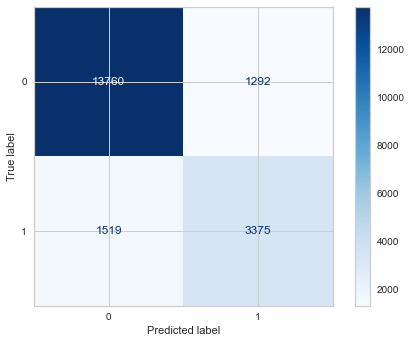

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
confusion_matrix(y_test, y_pred2)
m=plot_confusion_matrix(classifier2, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

In [14]:
#MLP with regularization final and other parameters obatined from grid search

classifier = MLPClassifier( activation= 'tanh', alpha= 0.05, hidden_layer_sizes=(200, 150, 100, 50), learning_rate= 'adaptive', learning_rate_init= 0.001, shuffle= True,solver= 'sgd')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_pred, y_test)

o=accuracy_score(y_pred,y_test)
print(o)

0.8660884387847188


In [29]:
classifierty = MLPClassifier( activation= 'tanh', alpha= 0.05,max_iter=150, hidden_layer_sizes=(200, 150, 100, 50), learning_rate= 'adaptive', learning_rate_init= 0.001, shuffle= True,solver= 'sgd')
classifierty.fit(X_train, y_train)
y_predxx = classifierty.predict(X_test)
cm = confusion_matrix(y_predxx, y_test)

o=accuracy_score(y_predxx,y_test)
print(o)

0.8679434473077309


In [34]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_predxx))
print('Precision: %.3f' % precision_score(y_test, y_predxx))
print('Recall: %.3f' % recall_score(y_test, y_predxx))
print('F1: %.3f' % f1_score(y_test, y_predxx))

Accuracy: 0.868
Precision: 0.724
Recall: 0.747
F1: 0.735


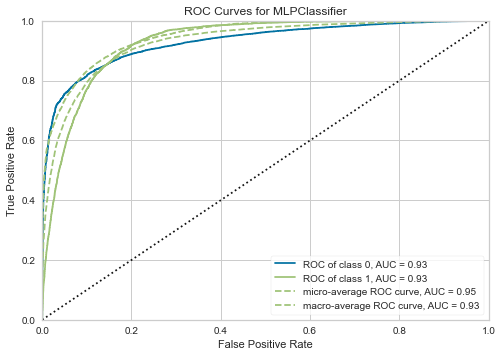

<AxesSubplot:title={'center':'ROC Curves for MLPClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [35]:
import yellowbrick
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(classifierty, classes=[0, 1])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()  

In [22]:
epochs = 300
from sklearn.metrics import log_loss
classifierx = MLPClassifier(activation= 'tanh', alpha= 0.05, hidden_layer_sizes=(200, 150, 100, 50), learning_rate= 'adaptive', learning_rate_init= 0.001, shuffle= True,solver= 'sgd')

validation_loss_values = []
training_loss_values = []
for k in range(epochs):
    classifierx.partial_fit(X_train, y_train, classes=y_train)
    training_loss_values.append(classifierx.loss_)
    
    y_predx = classifierx.predict_proba(X_test)
    validation_loss_values.append(log_loss(y_test,y_predx))



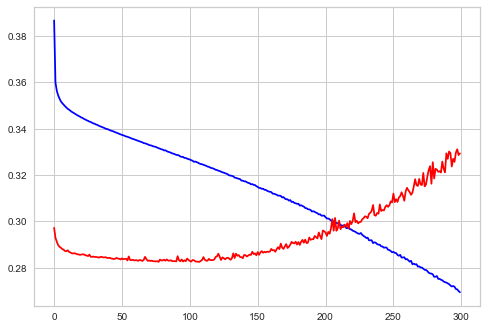

In [28]:

plt.plot(training_loss_values,color="blue")
plt.plot(validation_loss_values,color="red")
plt.show()

In [16]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1: %.3f' % f1_score(y_test, y_pred))

Accuracy: 0.866
Precision: 0.737
Recall: 0.706
F1: 0.721


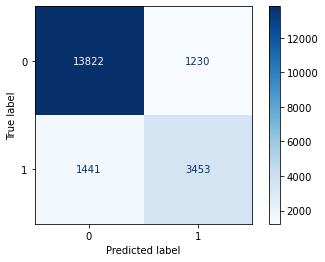

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
confusion_matrix(y_test, y_pred)
m=plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

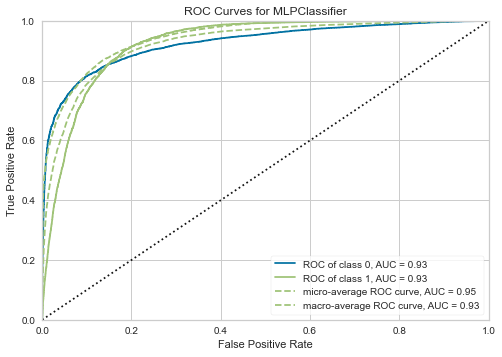

<AxesSubplot:title={'center':'ROC Curves for MLPClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [19]:
import yellowbrick
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(classifier, classes=[0, 1])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()  

In [117]:
#Not important

classifier = MLPClassifier(hidden_layer_sizes=(400,300,200,120,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(y_pred, y_test)
# print("Accuracy of MLPClassifier : ", accuracy(cm))
from sklearn.metrics import accuracy_score
o=accuracy_score(y_pred,y_test)
print(o)

0.8348039707209466


In [121]:
dataframe = pd.read_csv("train_data_new.csv.xls", header=None)
dataset = dataframe.values
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,181,182,183,184,185,186,187,188,189,190
0,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
1,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,22-06-2017,0.935854369,0.003535324,0.005764328,0.810965728,0.004222778,NaN,0.000970129,0.00851921,...,NaN,NaN,0.005136017,0.002996793,0.000795849,NaN,0.003694179,0.007364427,0.00436631,0
2,0000d17a1447b25a01e42e1ac56b091bb7cbb06317be4c...,26-08-2017,1.00236388,0.530085919,0.07925587,0.211974161,0.000166187,0.094155958,0.001267749,0.092330468,...,NaN,NaN,0.004333375,0.004169948,0.005830646,NaN,0.002061391,0.002049718,0.006981519,0
3,0002d381bdd8048d76719042cf1eb63caf53b636f8aacd...,21-11-2017,1.004736517,0.007491332,0.011268379,0.815235023,0.004707261,0.167982845,0.007021597,0.005781521,...,NaN,NaN,0.004526656,0.009969171,0.007596773,NaN,0.000388996,0.002957512,0.006376871,0
4,0002e335892f7998f0feb3a59f32d652f0da7c85e535b9...,24-06-2017,0.598885091,0.004560882,0.006513613,0.81940714,0.003297635,NaN,0.001530079,0.005175743,...,NaN,NaN,0.004919582,0.00179783,0.006086543,NaN,0.002923543,0.005213197,0.00623523,1
